In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


In [2]:
#Importando el dataset

df_xclara = pd.read_csv('data/xclara.csv')
df_xclara.columns = ['Indice', 'V1', 'V2']
df_xclara.set_index('Indice', inplace=True)

df_xclara.head()

,V1,V2
Indice,,
1,2.072345,-3.241693
2,17.936710,15.784810
3,1.083576,7.319176
4,11.120670,14.406780
5,23.711550,2.557729


In [4]:
df_xclara.shape

(3000, 2)

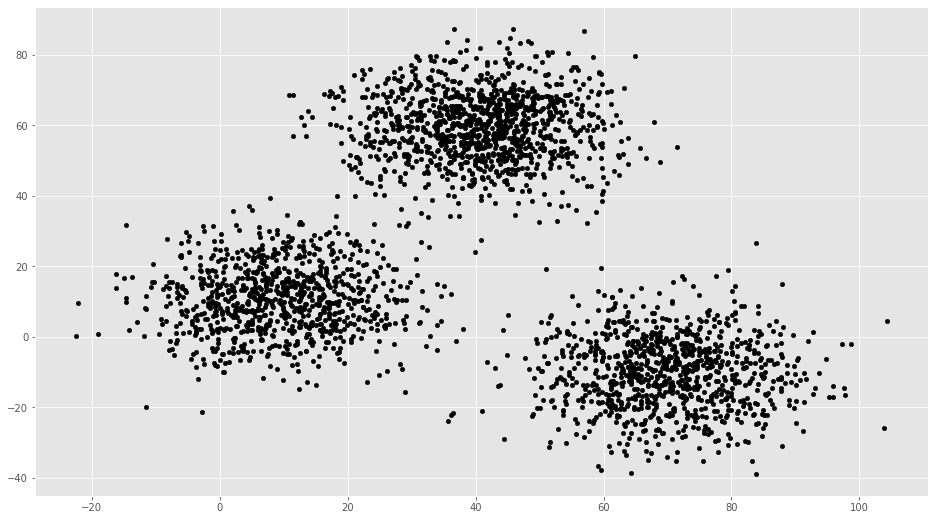

In [3]:
x1 = df_xclara['V1'].values
x2 = df_xclara['V2'].values

X = np.array(list(zip(x1,x2)))

plt.scatter(x1, x2, c='black', s=20)

In [4]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [6]:
k=3

C_x = np.random.randint(0, np.max(X)-20, size=k)

C_y = np.random.randint(0, np.max(X)-20, size=k)

C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print (C)

[[32. 58.]
 [ 5. 11.]
 [14.  3.]]


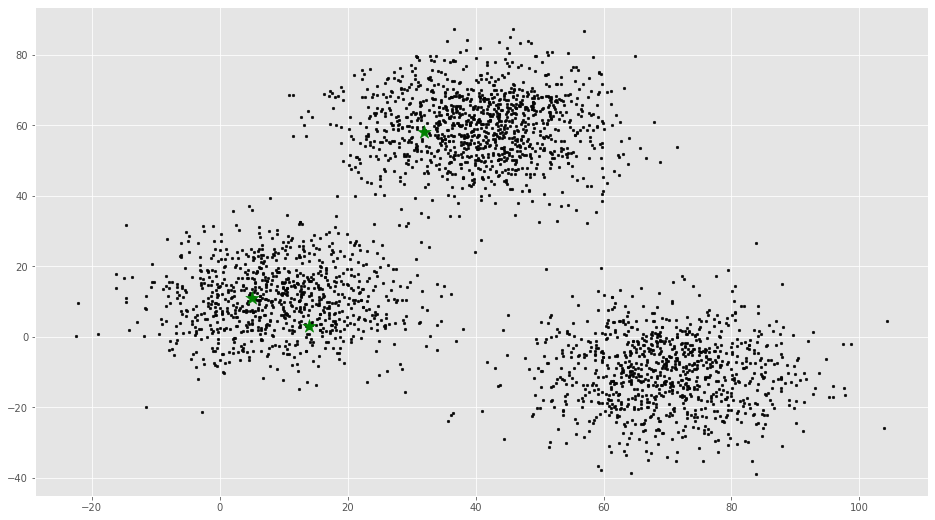

In [7]:
plt.scatter(x1, x2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [8]:
C_old = np.zeros(C.shape)

clusters = np.zeros(len(X))
error = dist(C, C_old)

while (error.any()!=0):
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old)

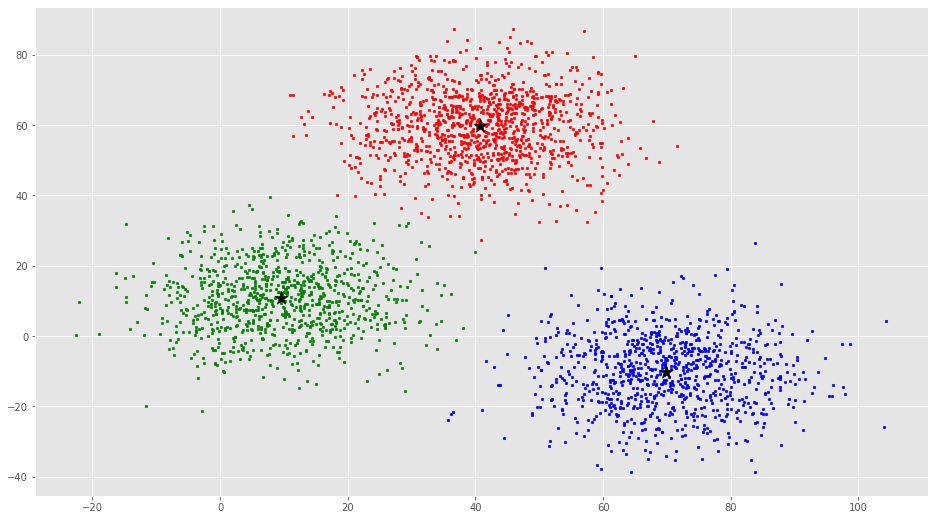

In [9]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

<H1> KMEANS with SKLEARN </H1>


In [10]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

# Comparing with scikit-learn centroids
print(C) # From Scratch
print(centroids) # From sci-kit learn

[[ 40.683628  59.715893]
 [  9.478045  10.686052]
 [ 69.92419  -10.119641]]
[[ 69.92418447 -10.11964119]
 [ 40.68362784  59.71589274]
 [  9.4780459   10.686052  ]]


## Método del codo 

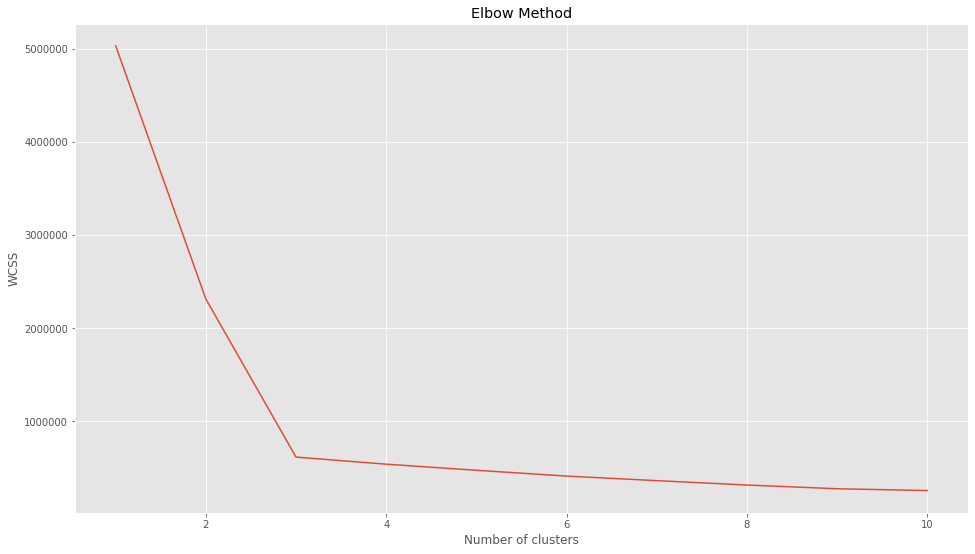

In [12]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', 
                    max_iter=300, 
                    n_init=10, 
                    random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Caso de USO 

https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/

Como ejemplo utilizaremos de entradas un conjunto de datos en el que se analizaban rasgos de la personalidad de usuarios de Twitter. Se ha filtrado a 140 «famosos» del mundo en diferentes areas: deporte, cantantes, actores, etc. Basado en una metodología de psicología conocida como «Ocean: The Big Five» tendemos como características de entrada:

- usuario (el nombre en Twitter)
- «op» = Openness to experience – grado de apertura mental a nuevas experiencias, curiosidad, arte
- «co» =Conscientiousness – grado de orden, prolijidad, organización
- «ex» = Extraversion – grado de timidez, solitario o participación ante el grupo social
- «ag» = Agreeableness – grado de empatía con los demás, temperamento
- «ne» = Neuroticism, – grado de neuroticismo, nervioso, irritabilidad, seguridad en sí mismo.
- Wordcount – Cantidad promedio de palabras usadas en sus tweets
- Categoria – Actividad laboral del usuario (actor, cantante, etc.)

In [13]:
!pip3 install seaborn

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [15]:
df_userpersonality = pd.read_csv("data/analisis.csv")
df_userpersonality.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [16]:
df_userpersonality.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678867,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


- 1. Actor/actriz
- 2. Cantante
- 3. Modelo
- 4. Tv, series
- 5. Radio
- 6. Tecnología
- 7. Deportes
- 8. Politica
- 9. Escritor 

In [17]:
df_userpersonality['categoria'].value_counts()

2    34
1    27
4    19
7    17
8    16
3     9
6     8
9     6
5     4
Name: categoria, dtype: int64

In [18]:
X = np.array(df_userpersonality[["op","ex","ag"]])
y = np.array(df_userpersonality['categoria'])
X.shape

(140, 3)

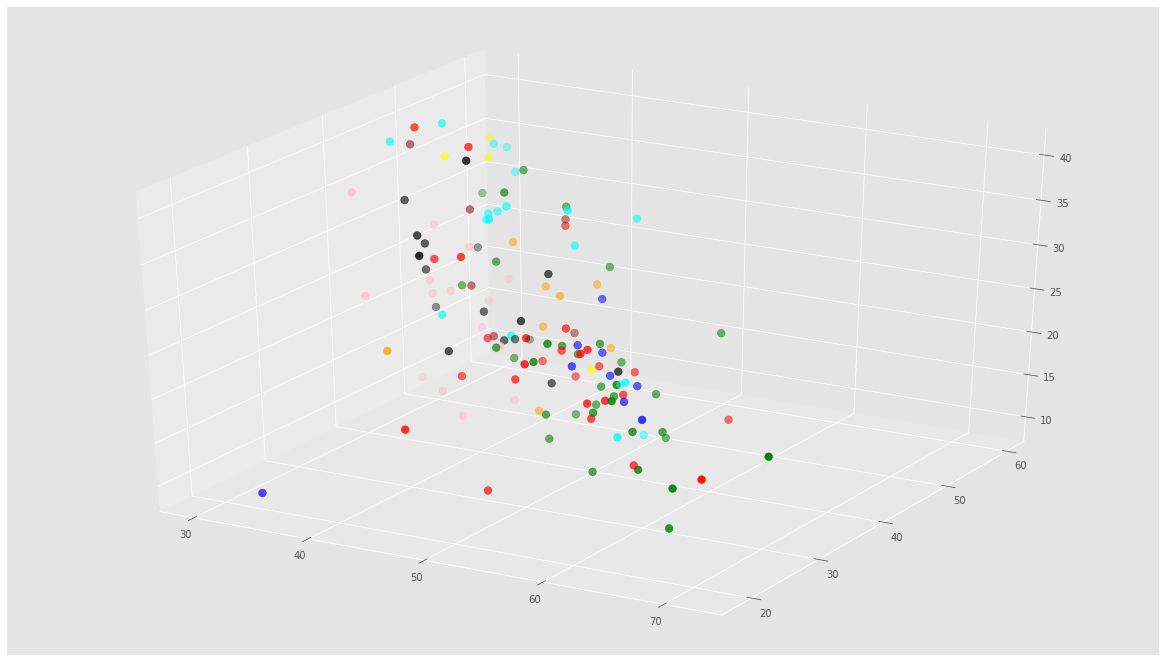

In [19]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

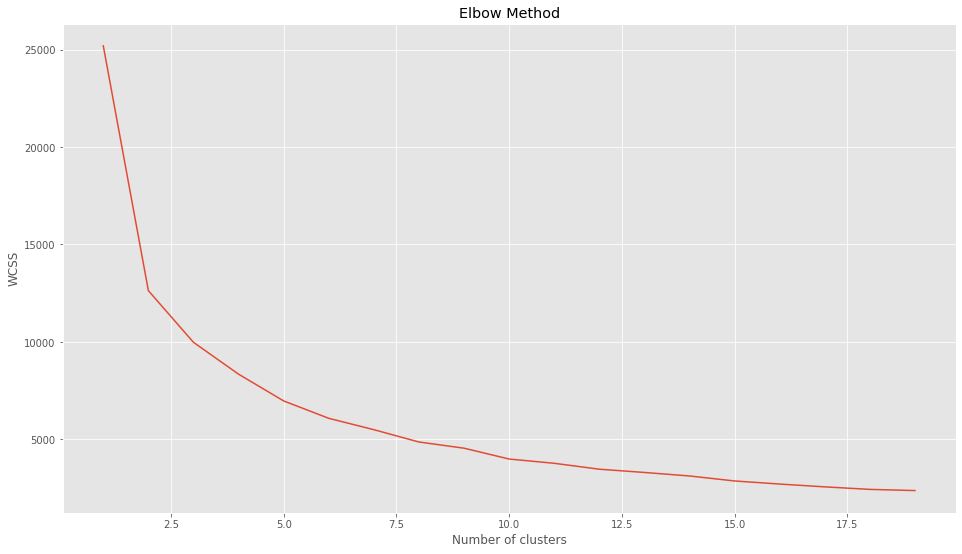

In [20]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[50.29293117 40.88830576 17.44525734]
 [35.90241306 47.56828232 33.58748762]
 [43.42489342 32.20419121 19.27634421]
 [59.42730336 30.78901593 16.13449193]
 [39.94672753 42.82349753 23.72594859]]


In [23]:
df_userpersonality["op"].mean()

44.41459089285714

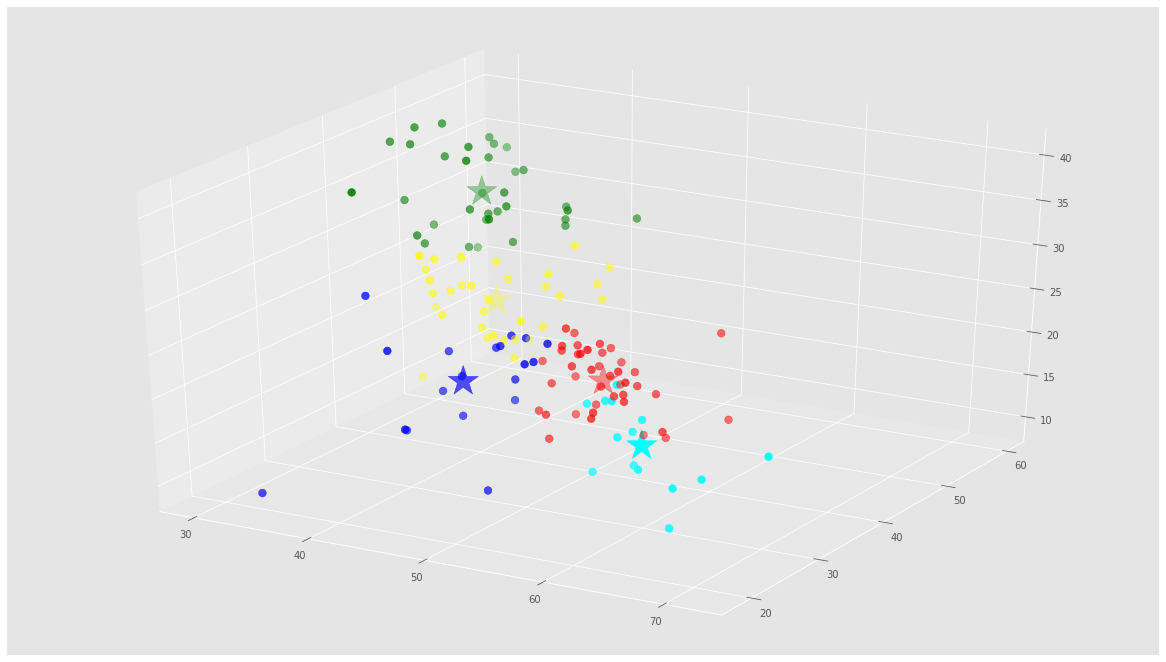

In [24]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

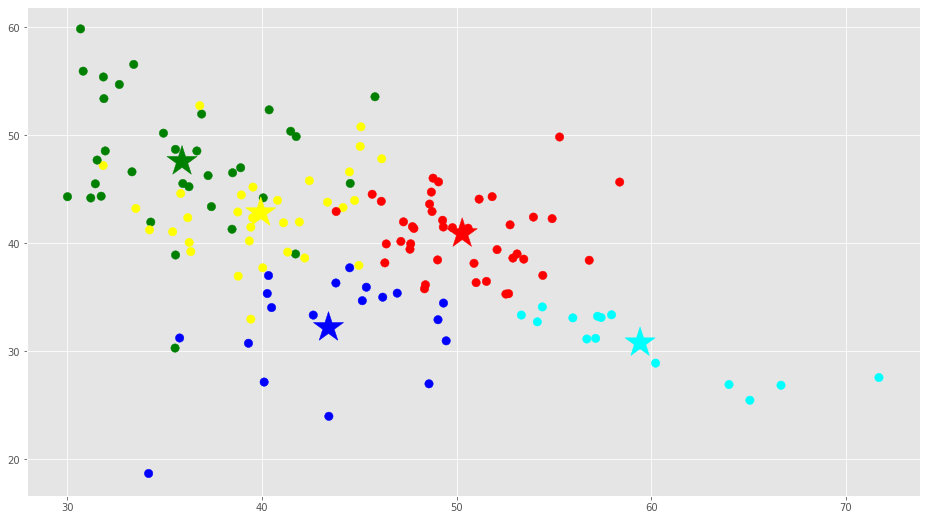

In [25]:
# Getting the values and plotting it
f1 = df_userpersonality['op'].values
f2 = df_userpersonality['ex'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

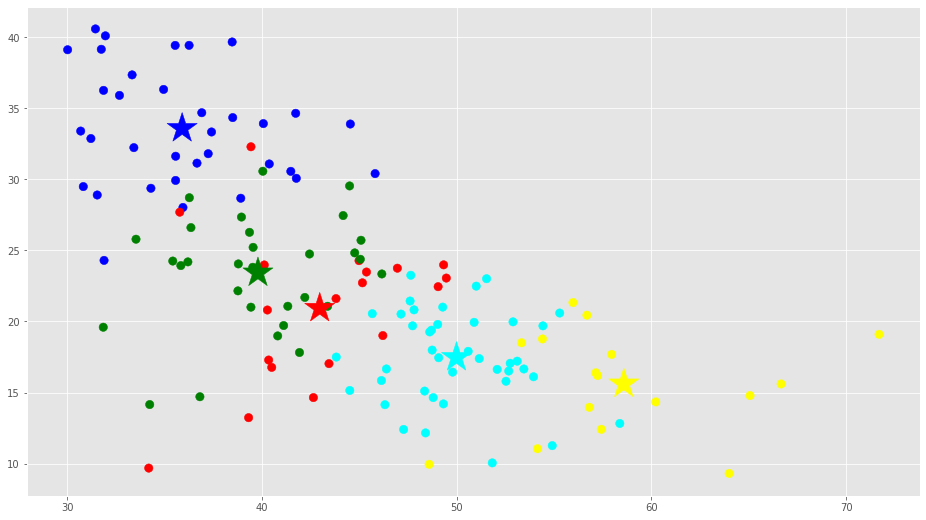

In [33]:
# Getting the values and plotting it
f1 = df_userpersonality['op'].values
f2 = df_userpersonality['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

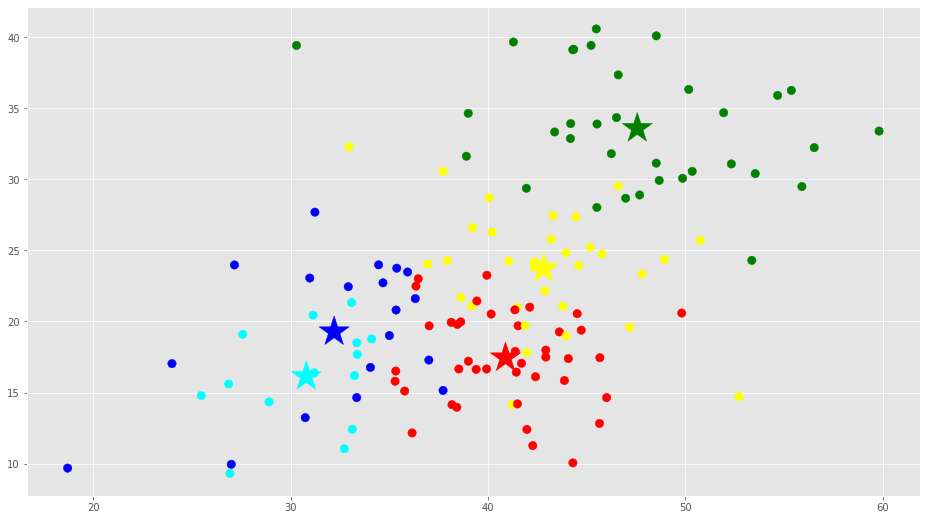

In [26]:
# Getting the values and plotting it
f1 = df_userpersonality['ex'].values
f2 = df_userpersonality['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [33]:
copy =  pd.DataFrame()
copy['usuario']=df_userpersonality['usuario'].values
copy['categoria']=df_userpersonality['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,19
1,green,28
2,blue,18
3,cyan,40
4,yellow,35


In [35]:
df_userpersonality['cluster'] = labels

In [36]:
df_userpersonality.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria,cluster
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7,4
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7,0
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2,1
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4,1


In [37]:
df_userpersonality.groupby(['cluster']).agg([np.mean])

,op,co,ex,ag,ne,wordcount,categoria
,mean,mean,mean,mean,mean,mean,mean
cluster,,,,,,,
0,43.113842,26.142136,32.828156,20.375076,9.957173,115.635847,4.578947
1,35.667105,18.803409,49.095481,33.936458,7.226670,66.830757,4.500000
2,57.922009,26.574124,31.503973,15.671995,6.239071,113.465644,1.833333
3,49.660633,23.525288,41.176690,17.548775,8.002320,113.588157,2.900000
4,39.176552,22.121633,42.699210,25.348564,8.459558,90.454786,5.857143


In [38]:
df_userpersonality.groupby(['cluster','categoria'])['usuario'].agg(['count'])

count
cluster categoria       
0       1              5
        2              3
        3              1
        4              1
        6              1
        7              2
        8              5
        9              1
1       1              3
        2              4
        4             11
        5              3
        7              3
        8              1
        9              3
2       1              6
        2             10
        3              1
        4              1
3       1             10
        2             14
        3              6
        4              3
        5              1
        6              2
        7              2
        8              1
        9              1
4       1              3
        2              3
        3              1
        4              3
        6              5
        7             10
        8              9
        9              1

In [53]:
df_userpersonality.groupby(['cluster'])['categoria'].agg(lambda x: pd.Series.mode(x)[0])

cluster
0    1
1    7
2    4
3    2
4    2
Name: categoria, dtype: int64